## Loading data

In [1]:
import pandas as pd
import numpy as np

chunksize = 100

list_of_dataframes = []

for df in pd.read_csv('MeanImputedScaledData.csv', chunksize=chunksize, index_col=0):
    list_of_dataframes.append(df)

result = pd.concat(list_of_dataframes)
df = result
df

AX-574114010  AX-564298109  AX-564298112  AX-574114011  AX-574114014  \
ID                                                                             
B-1000           0.0           0.0           0.0           0.0       1.61819   
B-1002           0.0           0.0           0.0           0.0       2.00000   
B-1003           0.0           0.0           0.0           1.0       1.00000   
B-1005           0.0           0.0           0.0           2.0       2.00000   
B-1006           0.0           0.0           0.0           2.0       2.00000   
...              ...           ...           ...           ...           ...   
Y_988            0.0           0.0           0.0           1.0       1.61819   
Y_991            1.0           1.0           0.0           0.0       2.00000   
Y_992            0.0           0.0           0.0           1.0       1.00000   
Y_995            0.0           0.0           0.0           0.0       2.00000   
Y_998            2.0           2.0           0.0           0.0       2.00000   

        AX-563423214  AX-575660822  AX-577073921  AX-564298209  AX-564298216  \
ID                                                                             
B-1000           0.0           0.0           0.0           0.0           0.0   
B-1002           0.0           0.0           2.0           2.0           0.0   
B-1003           0.0           0.0           0.0           1.0           0.0   
B-1005           0.0           0.0           2.0           1.0           0.0   
B-1006           0.0           0.0           2.0           2.0           0.0   
...              ...           ...           ...           ...           ...   
Y_988            0.0           0.0           1.0           0.0           0.0   
Y_991            0.0           0.0           0.0           0.0           0.0   
Y_992            0.0           0.0           2.0           0.0           0.0   
Y_995            0.0           0.0           0.0           0.0           0.0   
Y_998            0.0           0.0           0.0           0.0           0.0   

        ...  AX-574130077  AX-574130060  AX-574130061  AX-574130062       Pop  \
ID      ...                                                                     
B-1000  ...           0.0           0.0           0.0           0.0  Training   
B-1002  ...           0.0           0.0           0.0           0.0  Training   
B-1003  ...           0.0           0.0           0.0           0.0  Training   
B-1005  ...           0.0           0.0           0.0           0.0  Training   
B-1006  ...           0.0           0.0           0.0           0.0  Training   
...     ...           ...           ...           ...           ...       ...   
Y_988   ...           0.0           0.0           0.0           0.0  Training   
Y_991   ...           0.0           0.0           0.0           0.0  Training   
Y_992   ...           0.0           0.0           0.0           0.0  Training   
Y_995   ...           0.0           0.0           0.0           0.0  Training   
Y_998   ...           0.0           0.0           0.0           0.0  Training   

        Plate  Status    WWt   Group  Generation  
ID                                                
B-1000   RU11     0.0    NaN      F0          F0  
B-1002   RU10     0.0    NaN      F0          F0  
B-1003   RU10     0.0    NaN      F0          F0  
B-1005   RU11     0.0    NaN      F0          F0  
B-1006   RU10     1.0    NaN      F0          F0  
...       ...     ...    ...     ...         ...  
Y_988    RU28     1.0  12.73  FLGS23          F2  
Y_991    RU28     1.0  11.30  FLGS23          F2  
Y_992    RU28     0.0   9.48  FLGS23          F2  
Y_995    RU28     1.0   7.81  FLGS23          F2  
Y_998    RU28     1.0  10.54  FLGS23          F2  

[2423 rows x 65899 columns]

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

ax_columns = [col for col in df.columns if col.startswith('AX')]
# len(ax_columns)
X = df[ax_columns]
y = df["Status"]
X = X.to_numpy()
y = y.to_numpy()

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y)
    
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.81812574, -0.76982067, -0.02041218, ...,  0.        ,
         0.        ,  0.        ],
       [-0.81812574, -0.76982067, -0.02041218, ...,  0.        ,
         0.        ,  0.        ],
       [-0.81812574, -0.76982067, -0.02041218, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.81812574, -0.76982067, -0.02041218, ...,  0.        ,
         0.        ,  0.        ],
       [-0.81812574, -0.76982067, -0.02041218, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.90392783,  2.18940958, -0.02041218, ...,  0.        ,
         0.        ,  0.        ]])

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


## MLP with GPU

In [4]:
class SimpleMLP(nn.Module):
    def __init__(self, input_dim):
        super(SimpleMLP, self).__init__()

        self.fc1 = nn.Linear(input_dim, 256)
        # self.bn1 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(0.3)

        # self.fc2 = nn.Linear(256, 64)
        # # self.bn2 = nn.BatchNorm1d(64)
        # self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(256, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        # x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        # x = F.relu(self.fc2(x))
        # x = self.dropout2(x)
        return self.fc3(x)


In [5]:
def train_model(X_train, y_train, input_dim, X_val=None, y_val=None, epochs=50, batch_size=128, lr=0.005):
    X_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_tensor = torch.tensor(y_train, dtype=torch.long)
    train_loader = DataLoader(TensorDataset(X_tensor, y_tensor), batch_size=batch_size, shuffle=True)

    model = SimpleMLP(input_dim).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr) 

    history = {"loss": [], "acc": [], "val_loss": [], "val_acc": []}

    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        correct = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * inputs.size(0)
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()

        avg_loss = total_loss / len(train_loader.dataset)
        accuracy = correct / len(train_loader.dataset)
        history["loss"].append(avg_loss)
        history["acc"].append(accuracy)

        # Optional validation tracking
        if X_val is not None and y_val is not None:
            model.eval()
            with torch.no_grad():
                val_inputs = torch.tensor(X_val, dtype=torch.float32).to(device)
                val_labels = torch.tensor(y_val, dtype=torch.long).to(device)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels).item()
                val_preds = torch.argmax(val_outputs, dim=1)
                val_acc = accuracy_score(val_labels.cpu(), val_preds.cpu())
                history["val_loss"].append(val_loss)
                history["val_acc"].append(val_acc)

                print(f"Epoch {epoch+1}: Loss = {avg_loss:.4f}, Acc = {accuracy:.4f}, Val Loss = {val_loss:.4f}, Val Acc = {val_acc:.4f}")
        else:
            print(f"Epoch {epoch+1}: Loss = {avg_loss:.4f}, Acc = {accuracy:.4f}")

    return model, history

In [6]:
def plot_history(history):
    epochs = range(1, len(history["loss"]) + 1)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history["loss"], label='Train Loss')
    if history["val_loss"]: plt.plot(epochs, history["val_loss"], label='Val Loss')
    plt.title("Loss Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history["acc"], label='Train Accuracy')
    if history["val_acc"]: plt.plot(epochs, history["val_acc"], label='Val Accuracy')
    plt.title("Accuracy Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()


In [7]:
def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        inputs = torch.tensor(X_test, dtype=torch.float32).to(device)
        labels = torch.tensor(y_test, dtype=torch.long).to(device)
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        acc = accuracy_score(labels.cpu(), preds.cpu())
        report = classification_report(labels.cpu(), preds.cpu())
        print("\nTest Accuracy:", acc)
        print("Classification Report:\n", report)


Epoch 1: Loss = 0.6807, Acc = 0.5665, Val Loss = 0.6863, Val Acc = 0.5541
Epoch 2: Loss = 0.5163, Acc = 0.7858, Val Loss = 0.7045, Val Acc = 0.5541
Epoch 3: Loss = 0.4244, Acc = 0.8781, Val Loss = 0.7054, Val Acc = 0.5825
Epoch 4: Loss = 0.3568, Acc = 0.9258, Val Loss = 0.7062, Val Acc = 0.5722
Epoch 5: Loss = 0.3023, Acc = 0.9561, Val Loss = 0.7192, Val Acc = 0.5515
Epoch 6: Loss = 0.2595, Acc = 0.9606, Val Loss = 0.6966, Val Acc = 0.5825
Epoch 7: Loss = 0.2180, Acc = 0.9819, Val Loss = 0.7080, Val Acc = 0.6005
Epoch 8: Loss = 0.1903, Acc = 0.9858, Val Loss = 0.7201, Val Acc = 0.5722
Epoch 9: Loss = 0.1641, Acc = 0.9897, Val Loss = 0.7356, Val Acc = 0.5644
Epoch 10: Loss = 0.1417, Acc = 0.9968, Val Loss = 0.7358, Val Acc = 0.5825
Epoch 11: Loss = 0.1249, Acc = 0.9974, Val Loss = 0.7422, Val Acc = 0.5851
Epoch 12: Loss = 0.1110, Acc = 0.9987, Val Loss = 0.7497, Val Acc = 0.5696
Epoch 13: Loss = 0.0984, Acc = 0.9994, Val Loss = 0.7719, Val Acc = 0.5799
Epoch 14: Loss = 0.0878, Acc = 0.9

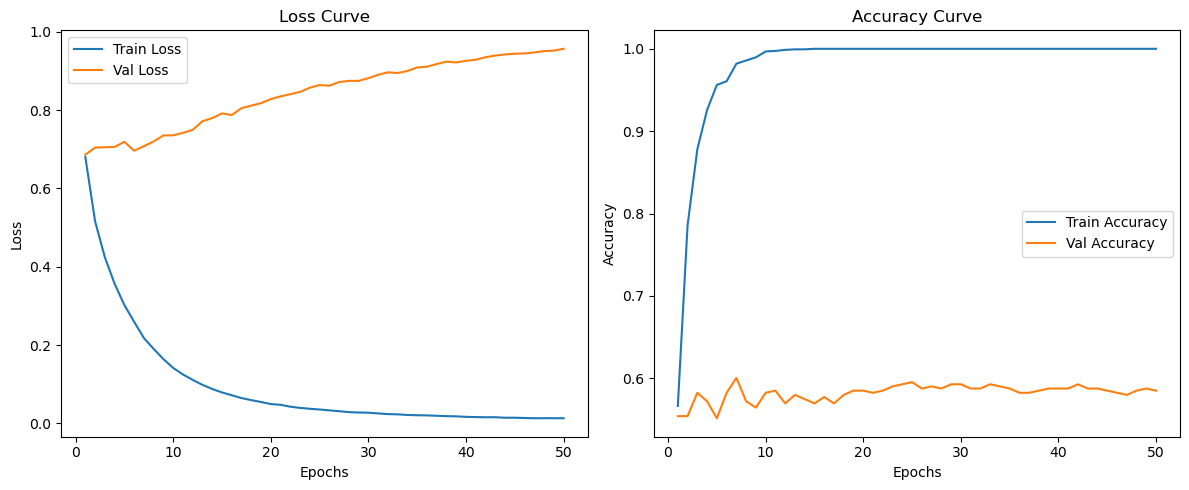

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

model, history = train_model(X_train_split, y_train_split, input_dim=X.shape[1], X_val=X_val, y_val=y_val, epochs=50)
# model.load_state_dict(torch.load("best_model.pth"))
evaluate_model(model, X_test, y_test)
plot_history(history)


## Bayesian optimization for MLP

In [9]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold

In [10]:
class FlexibleMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, activation):
        super(FlexibleMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(hidden_dim, 2)

        self.activation = {
            "relu": F.relu,
            "sigmoid": torch.sigmoid,
            "softplus": F.softplus,
            "leaky_relu": F.leaky_relu,
            "tanh": torch.tanh
        }[activation]

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.dropout1(x)
        return self.fc2(x)

def crossval_evaluate(epochs, lr, hidden_dim, batch_size, optimizer_choice, activation_choice,
                      X, y, input_dim, n_splits=10):
    epochs = int(epochs)
    hidden_dim = int(hidden_dim)
    batch_size = int(batch_size)

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    val_accuracies = []

    for train_idx, val_idx in skf.split(X, y):
        X_train_fold, X_val_fold = X[train_idx], X[val_idx]
        y_train_fold, y_val_fold = y[train_idx], y[val_idx]

        model = FlexibleMLP(input_dim, hidden_dim, activation_choice).to(device)
        criterion = nn.CrossEntropyLoss()

        optimizer_cls = {
            "SGD": optim.SGD,
            "Adam": optim.Adam,
            "RMSprop": optim.RMSprop
        }[optimizer_choice]
        optimizer = optimizer_cls(model.parameters(), lr=lr)

        train_loader = DataLoader(
            TensorDataset(torch.tensor(X_train_fold, dtype=torch.float32),
                          torch.tensor(y_train_fold, dtype=torch.long)),
            batch_size=batch_size, shuffle=True
        )

        for epoch in range(epochs):
            model.train()
            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

        # Evaluate on validation fold
        model.eval()
        with torch.no_grad():
            val_inputs = torch.tensor(X_val_fold, dtype=torch.float32).to(device)
            val_labels = torch.tensor(y_val_fold, dtype=torch.long).to(device)
            val_outputs = model(val_inputs)
            val_preds = torch.argmax(val_outputs, dim=1)
            val_acc = accuracy_score(val_labels.cpu(), val_preds.cpu())
            val_accuracies.append(val_acc)

    return np.mean(val_accuracies)


In [14]:
def bayes_optimize(X_train, y_train, X_val, y_val, input_dim, init_points=5, n_iter=100):
    def objective(epochs, lr, hidden_dim, batch_size, optimizer_idx, activation_idx):
        optimizers = ["Adam", "SGD", "RMSprop"]
        activations = ["relu", "sigmoid", "softplus", "leaky_relu", "tanh"]
        optimizer_choice = optimizers[int(optimizer_idx)]
        activation_choice = activations[int(activation_idx)]

        return crossval_evaluate(
            epochs, lr, hidden_dim, batch_size,
            optimizer_choice, activation_choice,
            X, y, input_dim, n_splits=10
        )

    pbounds = {
        "epochs": (20, 50),
        "lr": (0.001, 0.1),
        "hidden_dim": (16, 512),
        "batch_size": (32, 256),
        "optimizer_idx": (0, 2.999),     # Categorical: Adam, SGD, RMSprop
        "activation_idx": (0, 4.999)     # Categorical: relu, sigmoid, softplus, leaky_relu, tanh
    }

    optimizer = BayesianOptimization(
        f=objective,
        pbounds=pbounds,
        random_state=42,
        verbose=2
    )

    optimizer.maximize(init_points=init_points, n_iter=n_iter)
    return optimizer

optimizer = bayes_optimize(X_train, y_train, X_val, y_val, input_dim=X_train.shape[1]
)

|   iter    |  target   |  epochs   |    lr     | hidden... | batch_... | optimi... | activa... |
-------------------------------------------------------------------------------------------------
| 1         | 0.6339659 | 31.236203 | 0.0951207 | 379.06899 | 166.09950 | 0.4678999 | 0.7798166 |
| 2         | 0.5572152 | 21.742508 | 0.0867514 | 314.15304 | 190.60825 | 0.0617328 | 4.8485793 |
| 3         | 0.6298302 | 44.973279 | 0.0220215 | 106.18518 | 73.082610 | 0.9124224 | 2.6232574 |
| 4         | 0.5897612 | 32.958350 | 0.0298316 | 319.47903 | 63.246624 | 0.8761418 | 1.8314428 |
| 5         | 0.6471261 | 33.682099 | 0.0787324 | 115.03819 | 147.18851 | 1.7766512 | 0.2322056 |
| 6         | 0.6384773 | 33.415038 | 0.0380548 | 114.75636 | 147.01203 | 0.8551762 | 0.9870387 |
| 7         | 0.6277556 | 38.185588 | 0.1       | 119.79949 | 150.14492 | 2.999     | 0.0       |
| 8         | 0.6207342 | 34.340993 | 0.1       | 111.12874 | 153.10008 | 2.999     | 0.0       |
| 9         | 0.6376

In [16]:
print(optimizer.max)
for i, res in enumerate(optimizer.res):
    print("Iteration {}: \n\t{}".format(i, res))

{'target': np.float64(0.6582610617964153), 'params': {'epochs': np.float64(30.11954534163185), 'lr': np.float64(0.1), 'hidden_dim': np.float64(384.86501493718436), 'batch_size': np.float64(173.85909008541438), 'optimizer_idx': np.float64(1.8580638801858085), 'activation_idx': np.float64(1.3659858595091354)}}
Iteration 0: 
	{'target': np.float64(0.6339659218447098), 'params': {'epochs': np.float64(31.236203565420873), 'lr': np.float64(0.0951207163345817), 'hidden_dim': np.float64(379.0689951384569), 'batch_size': np.float64(166.0995004601362), 'optimizer_idx': np.float64(0.46789990268686715), 'activation_idx': np.float64(0.779816607160677)}}
Iteration 1: 
	{'target': np.float64(0.557215250144543), 'params': {'epochs': np.float64(21.742508365045985), 'lr': np.float64(0.08675143843171859), 'hidden_dim': np.float64(314.1530458246316), 'batch_size': np.float64(190.6082574263142), 'optimizer_idx': np.float64(0.06173289839311154), 'activation_idx': np.float64(4.8485793509578095)}}
Iteration 2

#### predict on test set with best model(s)

In [17]:
def evaluate_perfect_models_on_test(optimizer, X_train, y_train, X_val, y_val, X_test, y_test, input_dim):
    X_combined = np.vstack([X_train, X_val])
    y_combined = np.concatenate([y_train, y_val])

    perfect_models = [res for res in optimizer.res if res['target'] >= 0.645] ### adjust this threshold depending on optimizer
    print(f"Number of models tested: {len(perfect_models)}")

    results = []

    for idx, entry in enumerate(perfect_models):
        params = entry['params']
        # print(f"\nEvaluating model {idx+1} with params: {params}")

        epochs = int(params['epochs'])
        lr = params['lr']
        hidden_dim = int(params['hidden_dim'])
        batch_size = int(params['batch_size'])

        optimizers = ["Adam", "SGD", "RMSprop"]
        activations = ["relu", "sigmoid", "softplus", "leaky_relu", "tanh"]
        optimizer_idx = min(max(0, int(round(params['optimizer_idx']))), len(optimizers) - 1)
        activation_idx = min(max(0, int(round(params['activation_idx']))), len(activations) - 1)
        optimizer_choice = optimizers[optimizer_idx]
        activation_choice = activations[activation_idx]

        model = FlexibleMLP(input_dim, hidden_dim, activation_choice).to(device)
        criterion = nn.CrossEntropyLoss()

        optimizer_cls = {
            "SGD": optim.SGD,
            "Adam": optim.Adam,
            "RMSprop": optim.RMSprop
        }[optimizer_choice]
        optimizer_instance = optimizer_cls(model.parameters(), lr=lr)

        train_loader = DataLoader(
            TensorDataset(torch.tensor(X_combined, dtype=torch.float32),
                          torch.tensor(y_combined, dtype=torch.long)),
            batch_size=batch_size, shuffle=True
        )

        for epoch in range(epochs):
            model.train()
            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer_instance.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer_instance.step()

        model.eval()
        with torch.no_grad():
            X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
            y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

            outputs = model(X_test_tensor)
            preds = torch.argmax(outputs, dim=1)
            test_acc = accuracy_score(y_test_tensor.cpu(), preds.cpu())
            test_loss = criterion(outputs, y_test_tensor).item()

        # print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")
        results.append({
            "index": idx,
            "params": params,
            "test_acc": test_acc,
            "test_loss": test_loss
        })

    return results
    
results = evaluate_perfect_models_on_test(
    optimizer,
    X_train, y_train,
    X_val, y_val,
    X_test, y_test,
    input_dim=X_train.shape[1]
)
results

Number of models tested: 26


[{'index': 0,
  'params': {'epochs': np.float64(33.68209952651108),
   'lr': np.float64(0.07873242017790835),
   'hidden_dim': np.float64(115.03819595054642),
   'batch_size': np.float64(147.18851420464898),
   'optimizer_idx': np.float64(1.7766512920172655),
   'activation_idx': np.float64(0.23220561318726862)},
  'test_acc': 0.6618556701030928,
  'test_loss': 5680.78857421875},
 {'index': 1,
  'params': {'epochs': np.float64(27.95665391423738),
   'lr': np.float64(0.1),
   'hidden_dim': np.float64(385.1860537796167),
   'batch_size': np.float64(172.46414333497702),
   'optimizer_idx': np.float64(1.9859141750701936),
   'activation_idx': np.float64(0.16519595088618438)},
  'test_acc': 0.5896907216494846,
  'test_loss': 20556.23046875},
 {'index': 2,
  'params': {'epochs': np.float64(25.024827767208492),
   'lr': np.float64(0.09463023202953551),
   'hidden_dim': np.float64(383.1408532321161),
   'batch_size': np.float64(172.54954998121082),
   'optimizer_idx': np.float64(1.409589845520

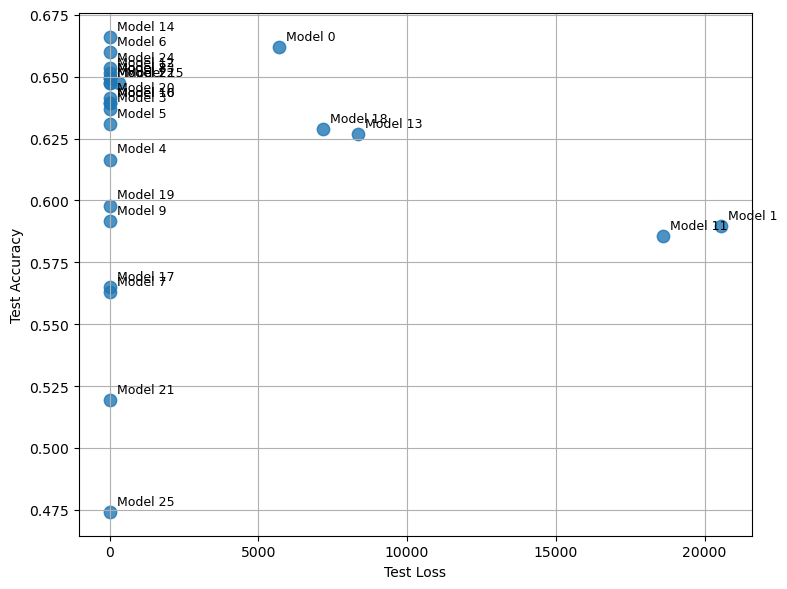

In [18]:
import matplotlib.pyplot as plt

def plot_test_accuracy_vs_loss(results):
    test_accuracies = [entry['test_acc'] for entry in results]
    test_losses = [entry['test_loss'] for entry in results]
    labels = [f"Model {entry['index']}" for entry in results]

    plt.figure(figsize=(8, 6))
    plt.scatter(test_losses, test_accuracies, s=80, alpha=0.8)

    for i, label in enumerate(labels):
        plt.annotate(label, (test_losses[i], test_accuracies[i]), fontsize=9, xytext=(5, 5), textcoords='offset points')

    plt.xlabel("Test Loss")
    plt.ylabel("Test Accuracy")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
plot_test_accuracy_vs_loss(results)


In [23]:
results_df = pd.DataFrame.from_dict(results)
sorted_results_df = results_df.sort_values(by='test_acc', ascending=False)
sorted_results_df

index                                             params  test_acc  \
14     14  {'epochs': 33.63218538096588, 'lr': 0.08687118...  0.665979   
0       0  {'epochs': 33.68209952651108, 'lr': 0.07873242...  0.661856   
6       6  {'epochs': 33.67992086051932, 'lr': 0.1, 'hidd...  0.659794   
24     24  {'epochs': 31.347356674216012, 'lr': 0.0897163...  0.653608   
12     12  {'epochs': 34.39110374324902, 'lr': 0.1, 'hidd...  0.651546   
8       8  {'epochs': 29.604879982148116, 'lr': 0.1, 'hid...  0.649485   
23     23  {'epochs': 44.17036811092889, 'lr': 0.04623511...  0.649485   
2       2  {'epochs': 25.024827767208492, 'lr': 0.0946302...  0.647423   
22     22  {'epochs': 27.73693401597154, 'lr': 0.00604458...  0.647423   
15     15  {'epochs': 43.97288373871429, 'lr': 0.01182359...  0.647423   
20     20  {'epochs': 40.490528093902526, 'lr': 0.0307401...  0.641237   
10     10  {'epochs': 34.61490391535865, 'lr': 0.1, 'hidd...  0.639175   
16     16  {'epochs': 42.101317576466386, 'lr': 0.0751477...  0.639175   
3       3  {'epochs': 29.88204269936745, 'lr': 0.07250964...  0.637113   
5       5  {'epochs': 29.035967067283337, 'lr': 0.1, 'hid...  0.630928   
18     18  {'epochs': 33.37112332705638, 'lr': 0.05075733...  0.628866   
13     13  {'epochs': 32.794551260007786, 'lr': 0.1, 'hid...  0.626804   
4       4  {'epochs': 33.28927980650626, 'lr': 0.001, 'hi...  0.616495   
19     19  {'epochs': 35.39615080646231, 'lr': 0.00582244...  0.597938   
9       9  {'epochs': 34.159070816879876, 'lr': 0.1, 'hid...  0.591753   
1       1  {'epochs': 27.95665391423738, 'lr': 0.1, 'hidd...  0.589691   
11     11  {'epochs': 32.93973996975955, 'lr': 0.1, 'hidd...  0.585567   
17     17  {'epochs': 29.576206054815334, 'lr': 0.0952130...  0.564948   
7       7  {'epochs': 30.11954534163185, 'lr': 0.1, 'hidd...  0.562887   
21     21  {'epochs': 33.433850604160696, 'lr': 0.1, 'hid...  0.519588   
25     25  {'epochs': 35.12143038671883, 'lr': 0.05976727...  0.474227   

       test_loss  
14      1.562537  
0    5680.788574  
6       1.668375  
24      1.412288  
12      1.286627  
8       1.196069  
23      1.354268  
2       1.246688  
22      0.851359  
15    321.355072  
20      1.253787  
10      1.548640  
16      1.489165  
3       1.177248  
5      18.848745  
18   7182.140137  
13   8344.644531  
4       0.635979  
19      0.703091  
9       1.372519  
1   20556.230469  
11  18593.730469  
17      8.783971  
7       7.203328  
21      2.068271  
25      1.624351

In [ ]:
def save_model_weights(results, model_index, X_train, y_train, X_val, y_val, input_dim, filename):
    try:
        params = results[model_index]['params']
        print(f"Rebuilding model {model_index} with params: {params}")

        optimizers = ["Adam", "SGD", "RMSprop"]
        activations = ["relu", "sigmoid", "softplus", "leaky_relu", "tanh"]
        optimizer_idx = min(max(0, int(round(params['optimizer_idx']))), len(optimizers) - 1)
        activation_idx = min(max(0, int(round(params['activation_idx']))), len(activations) - 1)
        optimizer_choice = optimizers[optimizer_idx]
        activation_choice = activations[activation_idx]
        print(f"Using {optimizer_choice} optimizer.")
        print(f"Using {activation_choice} activation.")

        epochs = int(params['epochs'])
        lr = float(params['lr'])
        hidden_dim = int(params['hidden_dim'])
        batch_size = int(params['batch_size'])

        X_combined = np.vstack([X_train, X_val])
        y_combined = np.concatenate([y_train, y_val])

        model = FlexibleMLP(input_dim, hidden_dim, activation_choice).to(device)
        criterion = nn.CrossEntropyLoss()

        optimizer_cls = {
            "SGD": optim.SGD,
            "Adam": optim.Adam,
            "RMSprop": optim.RMSprop
        }[optimizer_choice]
        optimizer = optimizer_cls(model.parameters(), lr=lr)

        train_loader = DataLoader(
            TensorDataset(torch.tensor(X_combined, dtype=torch.float32),
                          torch.tensor(y_combined, dtype=torch.long)),
            batch_size=batch_size,
            shuffle=True
        )

        for epoch in range(epochs):
            model.train()
            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

        # Save model weights
        torch.save(model.state_dict(), filename)
        print(f"Model {model_index} weights saved to '{filename}'.")

    except IndexError:
        print(f"Model index {model_index} is out of range.")
    except Exception as e:
        print(f"Error saving model weights: {e}")

#uncomment to save
save_model_weights(results, model_index=14, X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, input_dim=X_train.shape[1], filename="MLPweights.pth")

Rebuilding model 14 with params: {'epochs': np.float64(33.63218538096588), 'lr': np.float64(0.08687118086475329), 'hidden_dim': np.float64(113.94294050932533), 'batch_size': np.float64(150.08640073397808), 'optimizer_idx': np.float64(1.3333255874741632), 'activation_idx': np.float64(1.724225264715985)}
Using SGD optimizer.
Using softplus activation.
Model 14 weights saved to 'MLPweights.pth'.


## PCA MLP

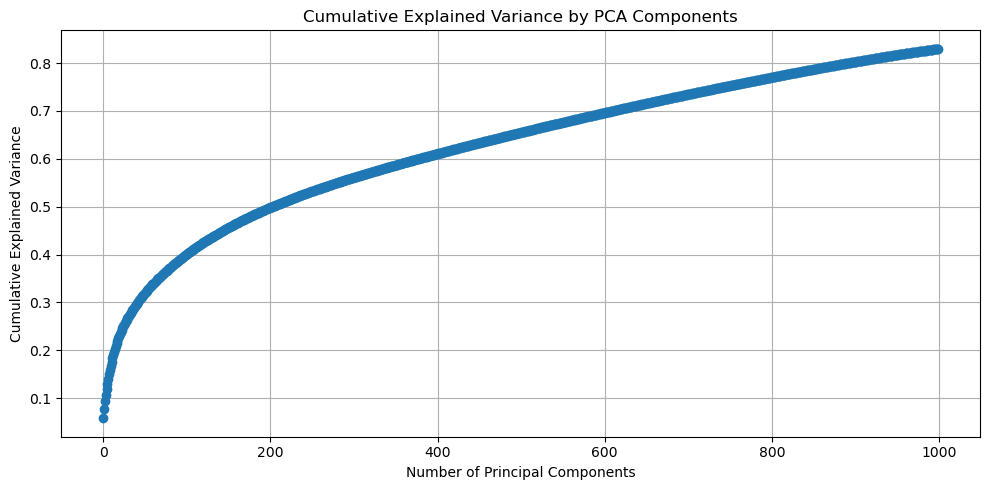

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=1000)
X_pca = pca.fit_transform(X)
# X_pca

plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
class PCAMLP(nn.Module):
    def __init__(self, input_dim):
        super(PCAMLP, self).__init__()

        self.fc1 = nn.Linear(input_dim, 256)
        # self.bn1 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(0.1)

        # self.fc2 = nn.Linear(256, 64)
        # # self.bn2 = nn.BatchNorm1d(64)
        # self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(256, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        # x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        # x = F.relu(self.fc2(x))
        # x = self.dropout2(x)
        return self.fc3(x)


In [22]:
def train_model(X_train, y_train, input_dim, X_val=None, y_val=None, epochs=50, batch_size=128, lr=0.005):
    X_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_tensor = torch.tensor(y_train, dtype=torch.long)
    train_loader = DataLoader(TensorDataset(X_tensor, y_tensor), batch_size=batch_size, shuffle=True)

    model = PCAMLP(input_dim).to(device)
    criterion = nn.CrossEntropyLoss()
    # optimizer = optim.SGD(model.parameters(), lr=lr, momentum = 0.5) 
    optimizer = optim.Adam(model.parameters(), lr=lr) 

    history = {"loss": [], "acc": [], "val_loss": [], "val_acc": []}

    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        correct = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * inputs.size(0)
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()

        avg_loss = total_loss / len(train_loader.dataset)
        accuracy = correct / len(train_loader.dataset)
        history["loss"].append(avg_loss)
        history["acc"].append(accuracy)

        # Optional validation tracking
        if X_val is not None and y_val is not None:
            model.eval()
            with torch.no_grad():
                val_inputs = torch.tensor(X_val, dtype=torch.float32).to(device)
                val_labels = torch.tensor(y_val, dtype=torch.long).to(device)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels).item()
                val_preds = torch.argmax(val_outputs, dim=1)
                val_acc = accuracy_score(val_labels.cpu(), val_preds.cpu())
                history["val_loss"].append(val_loss)
                history["val_acc"].append(val_acc)

                print(f"Epoch {epoch+1}: Loss = {avg_loss:.4f}, Acc = {accuracy:.4f}, Val Loss = {val_loss:.4f}, Val Acc = {val_acc:.4f}")
        else:
            print(f"Epoch {epoch+1}: Loss = {avg_loss:.4f}, Acc = {accuracy:.4f}")

    return model, history

Epoch 1: Loss = 1.5777, Acc = 0.5852, Val Loss = 0.9134, Val Acc = 0.5979
Epoch 2: Loss = 0.5485, Acc = 0.7897, Val Loss = 1.8421, Val Acc = 0.5515
Epoch 3: Loss = 0.3563, Acc = 0.8923, Val Loss = 1.6895, Val Acc = 0.5490
Epoch 4: Loss = 0.1409, Acc = 0.9439, Val Loss = 1.9738, Val Acc = 0.5722
Epoch 5: Loss = 0.0768, Acc = 0.9761, Val Loss = 2.5923, Val Acc = 0.5438
Epoch 6: Loss = 0.0432, Acc = 0.9832, Val Loss = 3.0346, Val Acc = 0.5515
Epoch 7: Loss = 0.0936, Acc = 0.9723, Val Loss = 3.2285, Val Acc = 0.5412
Epoch 8: Loss = 0.0457, Acc = 0.9845, Val Loss = 3.4414, Val Acc = 0.5490
Epoch 9: Loss = 0.0304, Acc = 0.9890, Val Loss = 3.7965, Val Acc = 0.5490
Epoch 10: Loss = 0.0404, Acc = 0.9858, Val Loss = 3.9497, Val Acc = 0.5722
Epoch 11: Loss = 0.0365, Acc = 0.9890, Val Loss = 4.2909, Val Acc = 0.5696
Epoch 12: Loss = 0.1165, Acc = 0.9852, Val Loss = 4.4793, Val Acc = 0.5619
Epoch 13: Loss = 0.1639, Acc = 0.9768, Val Loss = 4.3894, Val Acc = 0.5619
Epoch 14: Loss = 0.0967, Acc = 0.9

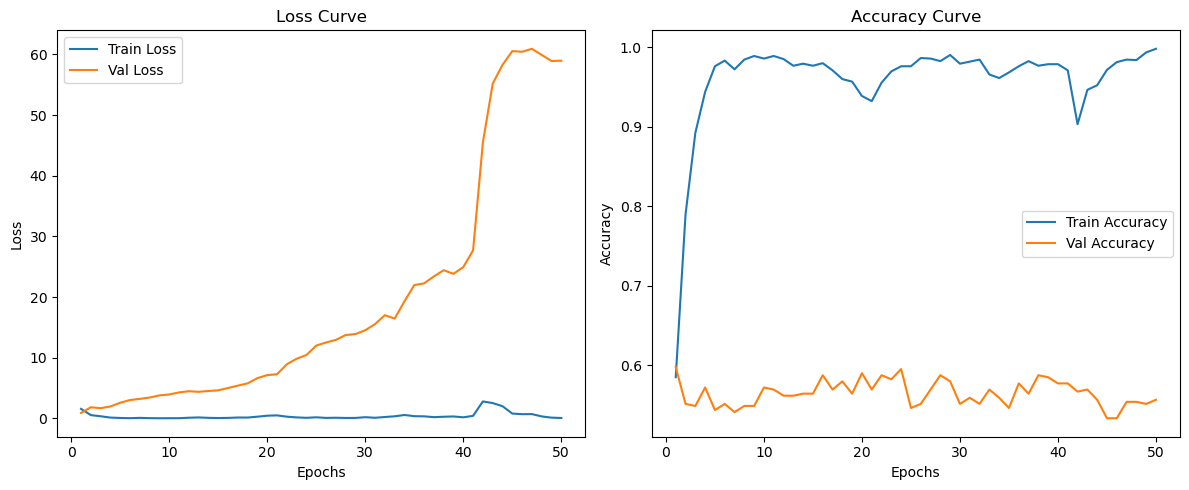

In [23]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)
X_train_split_pca, X_val_pca, y_train_split_pca, y_val_pca = train_test_split(X_train_pca, y_train_pca, test_size=0.2, random_state=42)

model, history = train_model(X_train_split_pca, y_train_split_pca, input_dim=X_pca.shape[1], X_val=X_val_pca, y_val=y_val_pca, epochs=50)
evaluate_model(model, X_test_pca, y_test_pca)
plot_history(history)


## CNN

In [25]:
class ConvNN(torch.nn.Module):

    def __init__(self, input_length, num_classes=2, kernel_size=50, pool_size=10):
        super().__init__()
        self.conv1 = nn.Conv1d(
            in_channels=1,
            out_channels=32,
            kernel_size=kernel_size,
            stride=1
        )
        self.pool = nn.MaxPool1d(kernel_size=pool_size)
        conv_output_length = ((input_length - kernel_size + 1) // pool_size)
        self.fc = nn.Linear(32 * conv_output_length, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1) 
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # flatten
        x = self.fc(x)
        return x



In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_tensor = torch.tensor(X_train, dtype=torch.float32)
y_tensor = torch.tensor(y_train, dtype=torch.long)

X_temp, X_test, y_temp, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

batch_size = 64
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=batch_size)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=batch_size)

# --- Training Setup ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ConvNN(input_length=X.shape[1]).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# --- Training Loop ---
epochs = 30
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * inputs.size(0)
        preds = torch.argmax(outputs, dim=1)
        correct += (preds == labels).sum().item()

    train_loss = total_loss / len(train_loader.dataset)
    train_acc = correct / len(train_loader.dataset)

    # --- Validation ---
    model.eval()
    val_correct = 0
    val_loss = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            preds = torch.argmax(outputs, dim=1)
            val_correct += (preds == labels).sum().item()

    val_loss /= len(val_loader.dataset)
    val_acc = val_correct / len(val_loader.dataset)

    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Train Acc = {train_acc:.4f} | Val Loss = {val_loss:.4f}, Val Acc = {val_acc:.4f}")

# --- Final Test Evaluation ---
model.eval()
test_correct = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        test_correct += (preds == labels).sum().item()

test_acc = test_correct / len(test_loader.dataset)
print(f"\nTest Accuracy: {test_acc:.4f}")


Epoch 1: Train Loss = 36.0110, Train Acc = 0.5411 | Val Loss = 0.6906, Val Acc = 0.5516
Epoch 2: Train Loss = 0.6447, Train Acc = 0.6492 | Val Loss = 0.6773, Val Acc = 0.5839
Epoch 3: Train Loss = 0.6188, Train Acc = 0.6831 | Val Loss = 0.6779, Val Acc = 0.5710
Epoch 4: Train Loss = 0.5888, Train Acc = 0.7250 | Val Loss = 0.7377, Val Acc = 0.4774
Epoch 5: Train Loss = 0.5553, Train Acc = 0.7613 | Val Loss = 0.6832, Val Acc = 0.5677
Epoch 6: Train Loss = 0.5154, Train Acc = 0.7984 | Val Loss = 0.6928, Val Acc = 0.5645
Epoch 7: Train Loss = 0.4760, Train Acc = 0.8129 | Val Loss = 0.7083, Val Acc = 0.5355
Epoch 8: Train Loss = 0.4404, Train Acc = 0.8331 | Val Loss = 0.7311, Val Acc = 0.5871
Epoch 9: Train Loss = 0.4148, Train Acc = 0.8347 | Val Loss = 0.7320, Val Acc = 0.5710
Epoch 10: Train Loss = 0.3764, Train Acc = 0.8540 | Val Loss = 0.8235, Val Acc = 0.5742
Epoch 11: Train Loss = 0.3502, Train Acc = 0.8790 | Val Loss = 0.7242, Val Acc = 0.5839
Epoch 12: Train Loss = 0.2970, Train Acc